# Step 1:

**This task includes such tables:**



*   accounts - Facebook public profiles with some data on them
*   posts - posts of these public profiles, you can use the profile_id column to connect to

*   sources_for_followers - number of followers for these public profiles


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
con = sqlite3.connect('task.db')

In [ ]:
# df = pd.read_csv('/content/post.csv', sep = ',')
# df = pd.read_csv('/content/accounts.csv', sep = ',')
# df = pd.read_csv('/content/sources_for_followers.csv', sep = ',')

df = pd.read_csv('/content/sources_for_followers.csv', sep = ',')
df.to_sql('sources_for_followers', con ,index=False, if_exists='replace')

In [ ]:
def get_select(sql):
  return pd.read_sql(sql, con)

# Step 2:
Merge the data
Create queries to merge data in SQL and provide short explanations for your queries.

In [ ]:
sql = '''
SELECT
    p.id as post_id,
    p.created_time,
    p.profile_id,
    p.text_original,
    p.comments_count,
    a.username,
    a.full_name,
    a.description,
    a.is_verified,
    a.restricted,
    a._id as account_id,
    a._status,
    a.id_alt,
    s.followers_count
FROM
    posts p
LEFT JOIN
    accounts a ON p.profile_id = a.id
LEFT JOIN
    sources_for_followers s ON a._id = s._id

ORDER BY created_time	 DESC

'''

get_select(sql)


,post_id,created_time,profile_id,text_original,comments_count,username,full_name,description,is_verified,restricted,account_id,_status,id_alt,followers_count
0,6108326612553849,2023-04-24 14:34:06+00,100039658642469,**Der Bumerang trifft die Richtigen** 3 Jahre ...,0,wochenblick,Wochenblick,Die neue Zeitung aus Oberösterreich\n\nDie Red...,0.0,None,12,downloaded,None,77000
1,6108302785889565,2023-04-24 14:24:58+00,100039658642469,IS-Schlächter planen neue Anschläge: Unsere Ki...,0,wochenblick,Wochenblick,Die neue Zeitung aus Oberösterreich\n\nDie Red...,0.0,None,12,downloaded,None,77000
2,610830136922304,2023-04-24 14:24:27+00,100039658642469,Nach Corona-Impfung erblindet: „Ich verklage B...,0,wochenblick,Wochenblick,Die neue Zeitung aus Oberösterreich\n\nDie Red...,0.0,None,12,downloaded,None,77000
3,6108299655889878,2023-04-24 14:23:44+00,100039658642469,„Grüne Vetternwirtschaft muss enden!“ „Liebe G...,0,wochenblick,Wochenblick,Die neue Zeitung aus Oberösterreich\n\nDie Red...,0.0,None,12,downloaded,None,77000
4,6108279592558551,2023-04-24 14:16:15+00,100039658642469,"Mal sehr gut erklärt, wie wir betrogen werden....",0,wochenblick,Wochenblick,Die neue Zeitung aus Oberösterreich\n\nDie Red...,0.0,None,12,downloaded,None,77000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,883897752632522,2022-12-13 17:09:00+00,100049129852371,"نصف النهائي.. ميسي يقود ""راقصي التانغو"" في موا...",33,Prüfe-alles-glaube-wenig-denke-selbst,"Prüfe alles, glaube wenig, denke selbst.",🙂 https://t.me/pruefealles & 🎬 https://rumble....,0.0,None,6,downloaded,None,74000
1017,676364313929971,2022-12-09 09:31:27+00,100049129852371,قمة الاتحاد الاقتصادي الأوراسي بمشاركة الرئيس ...,80,Prüfe-alles-glaube-wenig-denke-selbst,"Prüfe alles, glaube wenig, denke selbst.",🙂 https://t.me/pruefealles & 🎬 https://rumble....,0.0,None,6,downloaded,None,74000
1018,839969647150894,2022-12-01 19:34:35+00,233946916972658,"Ezúttal Mráz Ágoston Sámuel, a Nézőpont Intéze...",5,friedentotal,Frieden Total,"Ab Januar 2017 bei Facebook, Instagram & YouT...",0.0,None,107,downloaded,None,62416
1019,718852639572227,2022-12-01 16:01:48+00,100049129852371,لقاء خاص مع نائب وزير الخارجية الرسي سيرغي ريا...,46,Prüfe-alles-glaube-wenig-denke-selbst,"Prüfe alles, glaube wenig, denke selbst.",🙂 https://t.me/pruefealles & 🎬 https://rumble....,0.0,None,6,downloaded,None,74000


# Step 3:
Exploratory data analysis

In [ ]:
df = get_select(sql)
df.dtypes

id                   int64
created_time        object
profile_id           int64
text_original       object
comments_count       int64
username            object
full_name           object
description         object
is_verified        float64
restricted          object
_id                  int64
_status             object
id_alt              object
followers_count      int64
dtype: object


Data Information

In [ ]:
df = get_select(sql)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1021 non-null   int64  
 1   created_time     1021 non-null   object 
 2   profile_id       1021 non-null   int64  
 3   text_original    1021 non-null   object 
 4   comments_count   1021 non-null   int64  
 5   username         943 non-null    object 
 6   full_name        1021 non-null   object 
 7   description      982 non-null    object 
 8   is_verified      904 non-null    float64
 9   restricted       0 non-null      object 
 10  _id              1021 non-null   int64  
 11  _status          1021 non-null   object 
 12  id_alt           0 non-null      object 
 13  followers_count  1021 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 111.8+ KB
(1021, 14)


Checking of empty results

In [ ]:
df = get_select(sql)
df.isnull().sum()

id                    0
created_time          0
profile_id            0
text_original         0
comments_count        0
username             78
full_name             0
description          39
is_verified         117
restricted         1021
_id                   0
_status               0
id_alt             1021
followers_count       0
dtype: int64


Main statistical indicators

In [ ]:
df = get_select(sql)
df.describe()

                 id    profile_id  comments_count  is_verified          _id  \
count  1.021000e+03  1.021000e+03      1021.00000   904.000000  1021.000000   
mean   2.552574e+15  3.208149e+14        11.01763     0.309735   207.419197   
std    2.839013e+15  4.575640e+14        33.81054     0.462640   183.519718   
min    1.249306e+13  1.575861e+09         0.00000     0.000000     3.000000   
25%    7.050698e+14  1.000512e+14         0.00000     0.000000    51.000000   
50%    9.657605e+14  1.000646e+14         0.00000     0.000000   108.000000   
75%    3.419608e+15  2.339469e+14         5.00000     1.000000   365.000000   
max    1.016027e+16  1.492252e+15       447.00000     1.000000   603.000000   

       followers_count  
count      1021.000000  
mean     142642.677767  
std      205578.563569  
min       22600.000000  
25%       40000.000000  
50%       63460.000000  
75%      107436.000000  
max      834183.000000  


Posts creation dates.

<ipython-input-114-c14a78a0506e>:32: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


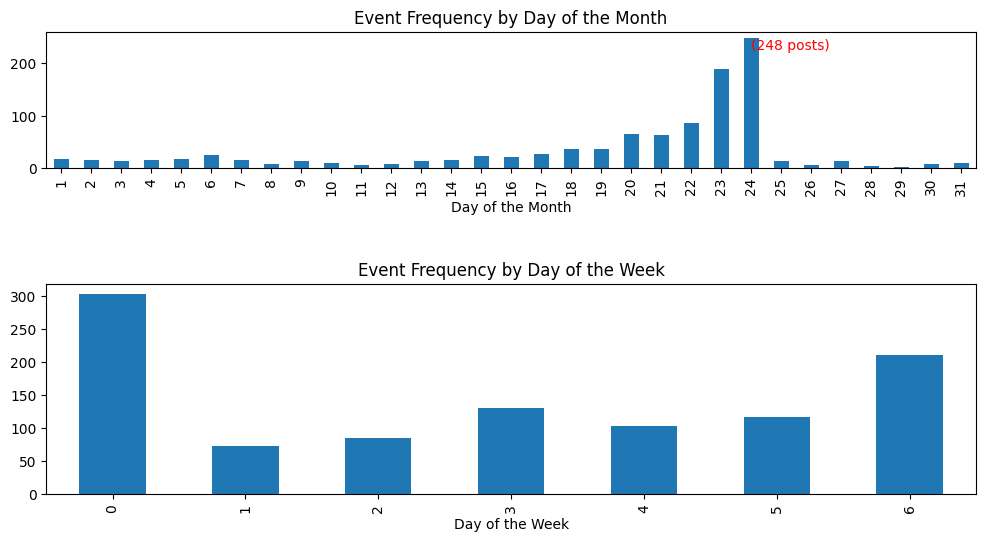

In [ ]:
df = get_select(sql)
df['created_time'] = pd.to_datetime(df['created_time'])

# Extract the day of the month
df['day'] = df['created_time'].dt.day

# Extract the day of the week (0 - Monday, 6 - Sunday)
df['weekday'] = df['created_time'].dt.weekday

# Count events by day of the month
daily_counts = df['day'].value_counts().sort_index()

# Find the day of the month with the highest number of posts
most_posts_day = daily_counts.idxmax()
most_posts_count = daily_counts.max()

# Count events by day of the week
weekday_counts = df['weekday'].value_counts().sort_index()

# Create plots
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
daily_counts.plot(kind='bar', title='Event Frequency by Day of the Month')
plt.xlabel('Day of the Month')
plt.text(most_posts_day - 1, most_posts_count, f'({most_posts_count} posts)', ha='left', va='top', color='red')

plt.subplot(2, 1, 2)
weekday_counts.plot(kind='bar', title='Event Frequency by Day of the Week')
plt.xlabel('Day of the Week')

plt.tight_layout()
plt.show()

### Conclusions:
- The data is not complete:
      username 78
      description 39
      is_verified 117
      restricted 1021
      id_alt 1021
- After analysis, I noticed that most posts were created on 2023-04-24
- In general most posts are created on Saturday and Sunday



# Step 4:

Top 10 overperforming posts

In [ ]:
df = get_select(sql)


top_posts = df.sort_values(by='comments_count', ascending=False)

selected_columns = ['username', 'profile_id', 'comments_count']
top_10_posts = top_posts[selected_columns]


print(top_10_posts.head(10))

                                   username       profile_id  comments_count
939   Prüfe-alles-glaube-wenig-denke-selbst  100049129852371             447
997   Prüfe-alles-glaube-wenig-denke-selbst  100049129852371             405
110          Sergiu.Mihalcea.PaginaOficiala  100063622184348             341
999                            unzensuriert  100069390481601             291
852                            unzensuriert  100069390481601             190
675                            unzensuriert  100069390481601             188
996                            unzensuriert  100069390481601             186
1006  Prüfe-alles-glaube-wenig-denke-selbst  100049129852371             173
1007                           unzensuriert  100069390481601             156
940                            unzensuriert  100069390481601             148


Can you please analyse engagement on provided posts and provide short summary of your
findings?



* The "total_engagement_count" typically encompasses various forms of user interaction with content, such as likes, comments, shares, and so on. To calculate the total engagement count, we would require additional data. However, if we assert that the total engagement count is the result of (df['followers_count'] / df['comments_count']), then we can proceed with this assumption, although I'm not entirely certain about its accuracy. This issue may require further clarification.



In [ ]:
df = get_select(sql)

df['total_engagement_count'] = df['followers_count'] / df['comments_count']
grouped_data = df[['account_id', 'username', 'followers_count', 'comments_count', 'total_engagement_count']]

sorted_grouped_data = grouped_data.sort_values(by='comments_count', ascending=False)
top_10_sorted_data = sorted_grouped_data.head(10)

print(top_10_sorted_data)

      account_id                               username  followers_count  \
939            6  Prüfe-alles-glaube-wenig-denke-selbst            74000   
997            6  Prüfe-alles-glaube-wenig-denke-selbst            74000   
110          294         Sergiu.Mihalcea.PaginaOficiala           126000   
999           13                           unzensuriert            58000   
852           13                           unzensuriert            58000   
675           13                           unzensuriert            58000   
996           13                           unzensuriert            58000   
1006           6  Prüfe-alles-glaube-wenig-denke-selbst            74000   
1007          13                           unzensuriert            58000   
940           13                           unzensuriert            58000   

      comments_count  total_engagement_count  
939              447              165.548098  
997              405              182.716049  
110              341  